## Observations and Insights 

In [ ]:
# Drugs were evenly distributed across mice and gender which shows we have an unbiased data set.
# Of the 4 treatments analyzed (Capomulin, Ramicane, Infubinol, and Ceftamin), Capomulin seemed most effective in
# decreasing tumor size as the final tumor volume remained the smallest. 
# For the drug Capomulin, there seems to be a direct correlation between the average mouse weight and tumor size.
# As the mouse weight increased, the tumor volume increased. 
# For our inidvidual analysis of MouseID m601, the tumor volume decreased as the timepoint increased.
# This suggest the drug Capomulin was effective in decreasing tumor size over time.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "Resources/mouse_metadata.csv"
study_results_path = "Resources/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Idenitfy duplicate column in both datasets
print(mouse_metadata.columns)
print(study_results.columns)
merged_data = pd.merge(mouse_metadata, study_results, on ="Mouse ID")
# Display the data table for preview
merged_data.head()


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = len(merged_data['Mouse ID'].unique())
mice_count
# create DF to display total mice count
mice_count_df = pd.DataFrame({'Total Mice': [mice_count]})
mice_count_df

,Total Mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# sort df by Mouse ID and Timepoint. Groupby Timepoint then find any duplicate mice ID for each time.
mice_df = merged_data[['Mouse ID','Timepoint']]
# mice_df.head()
time_df = mice_df.groupby(['Timepoint'])
mice_dup = time_df['Mouse ID'].value_counts()
mice_dup

# create new DF and sort by mouse count to see how many mice have duplicate data
df = pd.DataFrame({'Mouse Count':mice_dup})
df.sort_values('Mouse Count', ascending = False)
df

Mouse Count
Timepoint Mouse ID             
0         g989                2
          a203                1
          a251                1
          a262                1
          a275                1
...                         ...
45        y865                1
          z578                1
          z581                1
          z795                1
          z969                1

[1888 rows x 1 columns]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_mice_df = merged_data.loc[merged_data['Mouse ID']=='g989',:]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_df = merged_data.loc[merged_data['Mouse ID']!='g989',:]
unique_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(unique_df['Mouse ID'])


1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# groupby drug regimen then run summary stats on tumor volume
drug_df = unique_df[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen'])

# calculate stats
drug_mean = drug_df.mean()
drug_median = drug_df.median()
drug_var = drug_df.var()
drug_std = drug_df.std()
drug_sem = drug_df.sem()

# Assemble the resulting series into a single summary dataframe.
drug_stats = pd.DataFrame(
            {'mean': drug_mean['Tumor Volume (mm3)'],
            'median':drug_median['Tumor Volume (mm3)'],
             'var': drug_var['Tumor Volume (mm3)'],
            'std': drug_std['Tumor Volume (mm3)'],
            'sem': drug_sem['Tumor Volume (mm3)']})
drug_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_df.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

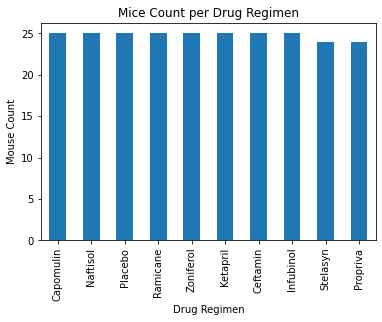

In [37]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# x axis - drug regimen, y axis - number of unique mice

mouse_drug_df = unique_df[["Drug Regimen","Mouse ID"]]
mouse_drug_unique_df = mouse_drug_df.drop_duplicates()
mouse_drug_unique = mouse_drug_unique_df['Drug Regimen'].value_counts()
mouse_drug_unique.plot(kind="bar",xlabel='Drug Regimen',ylabel="Mouse Count", title ="Mice Count per Drug Regimen")
plt.show()

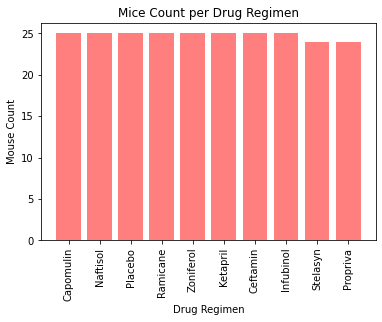

In [38]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.bar(mouse_drug_unique.index.values, mouse_drug_unique.values,color='r', alpha =0.5)
plt.xticks(rotation=90)
# plt.title(f'Mice Count per Drug Regimen')
plt.ylabel('Mouse Count')
plt.xlabel('Drug Regimen')
plt.title(f'Mice Count per Drug Regimen')
plt.show()

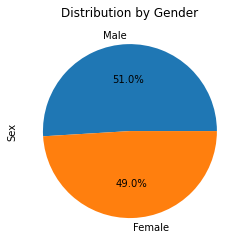

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# find distr by sex
gender_distr = unique_df['Sex'].value_counts()
gender_distr

gender_distr.plot.pie(y=gender_distr.values,autopct="%1.1f%%")
plt.title(f'Mice Distribution by Gender')
plt.show()

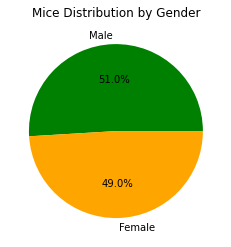

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_distr.values, colors =['green','orange'],labels=gender_distr.index.values,autopct="%1.1f%%")
plt.title(f'Mice Distribution by Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_time = unique_df.groupby(['Mouse ID'])['Timepoint'].max()
greatest_time_df = greatest_time.to_frame()
greatest_time_df = greatest_time_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_time_df = greatest_time_df.merge(unique_df,on=['Mouse ID','Timepoint'],how="left")
tumor_time_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# ******
# testing on individual drug regimen for for loop:
# treatment_df = tumor_time_df.loc[tumor_time_df['Drug Regimen']=='Infubinol']
# quartiles = treatment_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq
# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# outliers = treatment_df.loc[(treatment_df['Tumor Volume (mm3)'] < lower_bound) | (treatment_df['Tumor Volume (mm3)'] > upper_bound)]
# print(f'',treatment,'outliers:',outliers)


# #     print(f'Drug:',treatment_name)
# #     print(f'Quartiles:,\n',quartiles)
# #     print('Lower Q:',lowerq)
# #     print('Upper Q:',upperq)
# #     print('Inner Q:',iqr)
# print('Lower Bound:',lower_bound)
# print('Upper Bound',upper_bound)
# outliers

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    treatment_name = treatment
    treatment_df = tumor_time_df.loc[tumor_time_df['Drug Regimen']==treatment]
    quartiles = treatment_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Determine outliers using upper and lower bounds ***values outside of lower and upper bounds =outliers
    outliers = treatment_df.loc[(treatment_df['Tumor Volume (mm3)'] < lower_bound) | (treatment_df['Tumor Volume (mm3)'] > upper_bound)]
    print(f'',treatment,'outliers:',outliers['Mouse ID'])


#     print(f'Drug:',treatment_name)
#     print(f'Quartiles:,\n',quartiles)
#     print('Lower Q:',lowerq)
#     print('Upper Q:',upperq)
#     print('Inner Q:',iqr)
#     print('Lower Bound:',lower_bound)
#     print('Upper Bound',upper_bound)
    

 Capomulin outliers: Series([], Name: Mouse ID, dtype: object)
 Ramicane outliers: Series([], Name: Mouse ID, dtype: object)
 Infubinol outliers: 31    c326
Name: Mouse ID, dtype: object
 Ceftamin outliers: Series([], Name: Mouse ID, dtype: object)


In [16]:
# Locate the rows which contain mice on each drug and get the tumor volumes

infubinol_df = tumor_time_df.loc[tumor_time_df['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)']
capomulin_df = tumor_time_df.loc[tumor_time_df['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']
ramicane_df = tumor_time_df.loc[tumor_time_df['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)']
ceftamin_df = tumor_time_df.loc[tumor_time_df['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)']


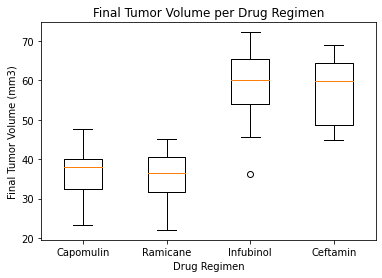

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([capomulin_df,ramicane_df,infubinol_df,ceftamin_df],labels=treatments)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.title(f'Final Tumor Volume per Drug Regimen')
plt.show()

## Line and Scatter Plots

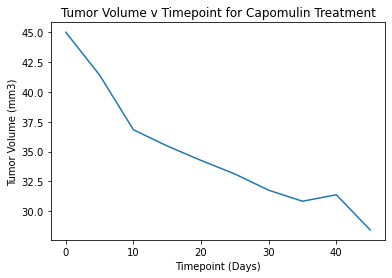

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Capomulin df
cap_df = unique_df.loc[unique_df['Drug Regimen']=='Capomulin']
cap_mouseIDs = cap_df['Mouse ID'].drop_duplicates()

# Extract Mouse ID for mouse treated w/ Capoumlin
cap_mouseIDs_df = cap_mouseIDs.to_frame()

# print(cap_mouseIDs_df.head(5))
mouseID ='m601'

# create new df for unique mouse
mouseID_df = cap_df.loc[cap_df['Mouse ID']==mouseID]
mouseID_df

# Plot data for mouse ID
plt.plot(mouseID_df['Timepoint'],mouseID_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume v Timepoint for Capomulin Treatment')
plt.show()

## Correlation and Regression

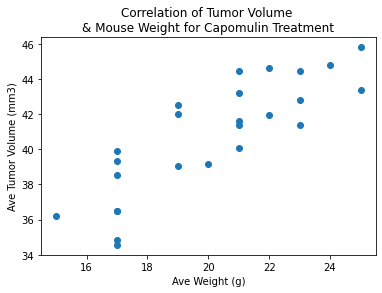

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_scatter_df = cap_df[['Mouse ID','Tumor Volume (mm3)','Weight (g)']]
ave_cap_scatter = cap_scatter_df.groupby(['Mouse ID']).mean()
ave_cap_scatter

weight = ave_cap_scatter['Weight (g)']
tumor_vol = ave_cap_scatter['Tumor Volume (mm3)']
plt.scatter(weight, tumor_vol)
plt.xlabel('Ave Weight (g)')
plt.ylabel('Ave Tumor Volume (mm3)')
plt.title(f'Correlation of Tumor Volume \n& Mouse Weight for Capomulin Treatment')
plt.show()

The correlation between average mouse weight and average tumor volume is 0.84


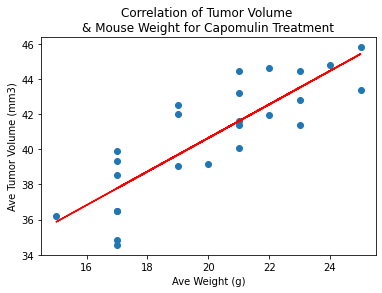

y =0.95x +21.55


In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight,tumor_vol)
# print(correlation)

print(f'The correlation between average mouse weight and average tumor volume is',round(correlation[0],2))

x_values = ave_cap_scatter['Weight (g)']
y_values = ave_cap_scatter['Tumor Volume (mm3)']
# print(x_values)
# print(y_values)

# calculate linear regression, y=mx+b
wv_slope, wv_int, wv_r, wv_p, wv_std_err = st.linregress(weight,tumor_vol)
wv_fit = wv_slope * x_values + wv_int
line_eq = 'y =' + str(round(wv_slope,2))+'x +' + str(round(wv_int,2))

# plot scatterplot of weight v tumor vol
plt.scatter(weight,tumor_vol)
plt.plot(weight,wv_fit,'-',color='red')
plt.xlabel('Ave Weight (g)')
plt.ylabel('Ave Tumor Volume (mm3)')
plt.title(f'Correlation of Tumor Volume \n& Mouse Weight for Capomulin Treatment')
plt.show()

print(line_eq)